In [21]:
%pip install currencyconverter

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from forex_python.converter import CurrencyRates
from currency_converter import CurrencyConverter

In [23]:
pd.set_option('display.max_columns', 500)

In [24]:
#1 loading the CSV file and showing top 5 records.
data = pd.read_csv('players_20.csv')
data = data.rename_axis('Rank', axis='columns')
data.head(5)

Rank,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07

In [25]:
data = data.astype({'wage_eur': 'float'})

In [26]:
data['USD_wage'] = data['wage_eur'] * 1.09

C:\Users\meetp\AppData\Local\Temp\ipykernel_3064\1545159534.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['USD_wage'] = data['wage_eur'] * 1.09


c = CurrencyRates()
data['wage_usd'] = data.apply(lambda x: c.convert(x.EUR, 'USD', x.wage_eur), axis = 1)
data.head(5)

In [27]:
def make_clickable(val):
    return f'<a target="_blank" href="{val}">{val}</a>'


In [28]:
#2 Showing all cloumn's name.
data.columns.values

array(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall',
       'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',
       'gk_speed', 'gk_positioning', 'player_traits',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'mo

In [29]:
#3 showing the number of rows and columns of the dataset.
data.shape

(18278, 105)

In [30]:
#4 Number of player in each countries
players = data.groupby('nationality')['short_name'].count()
players

nationality
Afghanistan            2
Albania               43
Algeria               50
Angola                16
Antigua & Barbuda      7
                    ... 
Venezuela             66
Vietnam                1
Wales                117
Zambia                10
Zimbabwe              12
Name: short_name, Length: 162, dtype: int64

In [31]:
#5 Showing top 5 countries with the highest amount of players
grap = players.sort_values(ascending=False).head(5)
grap = grap.reset_index()
grap

,nationality,short_name
0,England,1667
1,Germany,1216
2,Spain,1035
3,France,984
4,Argentina,886


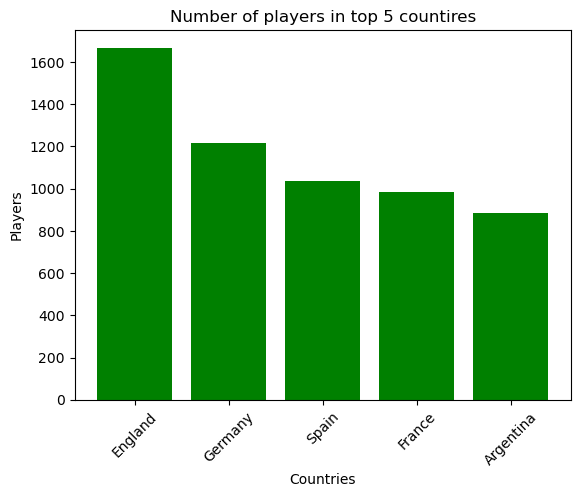

In [32]:
#6 Bar graph for top 5 countries and number of players.
plt.bar(grap['nationality'], grap['short_name'], color = 'green')

plt.xticks(rotation = 45)
plt.title('Number of players in top 5 countires')
plt.xlabel('Countries')
plt.ylabel('Players')
plt.show()

In [33]:
#7 showing top 5 players short name and wages
top5 = data[['short_name', 'USD_wage']].head(5).sort_values('USD_wage', ascending=False)
top5

Rank,short_name,USD_wage
0,L. Messi,615850.0
4,E. Hazard,512300.0
1,Cristiano Ronaldo,441450.0
2,Neymar Jr,316100.0
3,J. Oblak,136250.0


In [34]:
#8 showing top 5 players short name and wages that are getting highest salaries.
higestsalary = data[['short_name', 'USD_wage']].sort_values('USD_wage', ascending=False).head(5)
higestsalary

Rank,short_name,USD_wage
0,L. Messi,615850.0
4,E. Hazard,512300.0
1,Cristiano Ronaldo,441450.0
5,K. De Bruyne,403300.0
22,A. Griezmann,403300.0


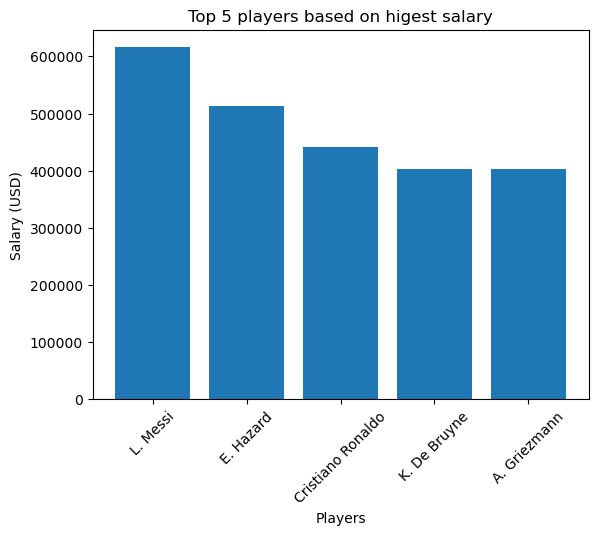

In [35]:
#9 Bar plot of short names and wages of highest salaries 
plt.bar(higestsalary['short_name'], higestsalary['USD_wage'])

plt.xticks(rotation = 45)
plt.title('Top 5 players based on higest salary')
plt.xlabel('Players')
plt.ylabel('Salary (USD)')
plt.show()

In [36]:
#10 top 10 player records of germany
germany = data.loc[data['nationality'] == 'Germany']
germany = germany.sort_values('overall' , ascending= False).head(10)
germany.style.format({'player_url': make_clickable})


Rank,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,USD_wage
6,192448,https://sofifa.com/player/192448/marc-andre-ter-stegen/20/159586,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,90,93,67500000,250000.000000,GK,Right,3,4,1,Medium/Medium,Normal,Yes,143400000.000000,nan,GK,1.000000,nan,2014-07-01,2022.000000,SUB,22.000000,nan,nan,nan,nan,nan,nan,88.000000,85.000000,88.000000,90.000000,45.000000,88.000000,"Swerve Pass, Acrobatic Clearance, Flair Passes",18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,272500.000000
36,182521,https://sofifa.com/player/182521/toni-kroos/20/159586,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,88,88,57000000,330000.000000,CM,Right,4,5,3,Medium/Medium,Normal,Yes,116900000.000000,"#Playmaker , #Crosser, #Complete Midfielder",LCM,8.000000,nan,2014-07-17,2023.000000,SUB,8.000000,45.000000,80.000000,90.000000,81.000000,70.000000,69.000000,nan,nan,nan,nan,nan,nan,"Argues with Officials, Finesse Shot, Crowd Favourite",88,75,58,91,82,80,86,84,92,89,50,41,60,87,71,87,30,74,73,86,60,76,75,89,73,88,72,70,62,10,11,13,7,10,75+3,75+3,75+3,78+3,79+3,79+3,79+3,78+3,81+3,81+3,81+3,79+3,85+3,85+3,85+3,79+3,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3,359700.000000
37,188350,https://sofifa.com/player/188350/marco-reus/20/159586,M. Reus,Marco Reus,30,1989-05-31,180,71,Germany,Borussia Dortmund,88,88,56000000,170000.000000,"CAM, LM, ST",Right,4,4,4,High/Medium,Lean,Yes,92400000.000000,"#Dribbler, #Playmaker , #Distance Shooter, #FK Specialist, #Acrobat, #Clinical Finisher, #Complete Midfielder, #Complete Forward",CAM,11.000000,nan,2012-07-01,2023.000000,ST,11.000000,85.000000,88.000000,84.000000,87.000000,45.000000,66.000000,nan,nan,nan,nan,nan,nan,"Power Free-Kick, Avoids Using Weaker Foot, Beat Offside Trap, Argues with Officials, Early Crosser, Finesse Shot, Speed Dribbler (CPU AI Only)",82,87,49,86,90,87,89,86,77,88,85,85,86,87,84,88,71,76,67,87,51,48,89,86,90,85,49,37,45,12,12,13,13,11,82+3,82+3,82+3,86+3,86+3,86+3,86+3,86+3,86+3,86+3,86+3,85+3,80+3,80+3,80+3,85+3,69+3,65+3,65+3,65+3,69+3,64+3,55+3,55+3,55+3,64+3,185300.000000
31,167495,https://sofifa.com/player/167495/manuel-neuer/20/159586,M. Neuer,Manuel Neuer,33,1986-03-27,193,92,Germany,FC Bayern München,88,88,32000000,155000.000000,GK,Right,5,4,1,Medium/Medium,Normal,Yes,52800000.000000,nan,GK,1.000000,nan,2011-07-01,2021.000000,GK,1.000000,nan,nan,nan,nan,nan,nan,87.000000,87.000000,91.000000,87.000000,57.000000,85.000000,"Power Free-Kick, Flair, Swerve Pass, Acrobatic Clearance",15,13,25,55,11,30,14,11,59,46,54,60,51,84,35,68,77,43,80,16,29,30,12,70,47,70,17,10,

In [39]:
#11 top 5 records of germany players who have maximum height weight and wages.

#germany.nlargest(5, ['weight_kg', 'height_cm', 'wage_eur'])

germany.sort_values(by=['height_cm', 'weight_kg', 'USD_wage'], inplace=True, ascending=[False, False, False])
germany.head(5)


Rank,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,USD_wage
77,212190,https://sofifa.com/player/212190/niklas-sule/2...,N. Süle,Niklas Süle,23,1995-09-03,195,97,Germany,FC Bayern München,85,90,46500000,115000.0,CB,Right,2,3,2,Medium/Medium,Stocky,Yes,80200000.0,"#Aerial Threat, #Tackling , #Strength",RCB,4.0,NaN,2017-07-01,2022.0,RCB,15.0,72.0,42.0,55.0,50.0,86.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,22,86,78,33,43,28,30,69,63,53,87,34,81,33,77,40,66,94,62,83,81,26,40,32,75,85,89,87,15,7,14,7,15,57+2,57+2,57+2,50+2,53+2,53+2,53+2,50+2,54+2,54+2,54+2,54+2,62+2,62+2,62+2,54+2,71+2,77+2,77+2,77+2,71+2,75+2,83+2,83+2,83+2,75+2,125350.0
31,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,33,1986-03-27,193,92,Germany,FC Bayern München,88,88,32000000,155000.0,GK,Right,5,4,1,Medium/Medium,Normal,Yes,52800000.0,NaN,GK,1.0,NaN,2011-07-01,2021.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,87.0,91.0,87.0,57.0,85.0,"Power Free-Kick, Flair, Swerve Pass, Acrobatic...",15,13,25,55,11,30,14,11,59,46,54,60,51,84,35,68,77,43,80,16,29,30,12,70,47,70,17,10,11,87,87,91,85,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168950.0
49,178603,https://sofifa.com/player/178603/mats-hummels/...,M. Hummels,Mats Hummels,30,1988-12-16,191,94,Germany,Borussia Dortmund,87,87,41000000,130000.0,CB,Right,4,3,3,High/Medium,Normal,Yes,67700000.0,"#Tackling , #Tactician",LCB,15.0,NaN,2019-07-01,2022.0,NaN,NaN,51.0,58.0,76.0,72.0,89.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,"Avoids Using Weaker Foot, Leadership, Finesse ...",64,55,87,81,60,68,65,53,85,81,46,55,64,87,59,71,68,65,85,51,71,89,56,79,68,89,90,89,86,15,6,10,5,6,68+3,68+3,68+3,67+3,68+3,68+3,68+3,67+3,71+3,71+3,71+3,69+3,77+3,77+3,77+3,69+3,77+3,83+3,83+3,83+3,77+3,78+3,84+3,84+3,84+3,78+3,141700.0
122,192563,https://sofifa.com/player/192563/bernd-leno/20...,B. Leno,Bernd Leno,27,1992-03-04,190,83,Germany,Arsenal,84,86,26000000,91000.0,GK,Right,3,3,1,Medium/Medium,Normal,Yes,51400000.0,NaN,GK,1.0,NaN,2018-07-01,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,81.0,78.0,85.0,56.0,84.0,Swerve Pass,9,9,13,45,10,16,9,8,42,30,55,56,52,79,44,59,73,43,68,14,28,22,7,54,23,66,27,15,18,83,81,78,84,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99190.0
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,90,93,67500000,250000.0,GK,Right,3,4,1,Medium/Medium,Normal,Yes,143400000.0,NaN,GK,1.0,NaN,2014-07-01,2022.0,SUB,22.0,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,88.0,90.0,45.0,88.0,"Swerve Pass, Acrobatic Clearance, Flair Passes",18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,NaN,

In [40]:
#12 Showing short names and wages of top 5 germany players
top5_germany = germany.sort_values('overall', ascending=False).head(5)
top5_germany = top5_germany[['short_name', 'USD_wage', 'nationality', 'player_url']]
top5_germany.style.format({'player_url': make_clickable})



Rank,short_name,USD_wage,nationality,player_url
6,M. ter Stegen,272500.000000,Germany,https://sofifa.com/player/192448/marc-andre-ter-stegen/20/159586
31,M. Neuer,168950.000000,Germany,https://sofifa.com/player/167495/manuel-neuer/20/159586
36,T. Kroos,359700.000000,Germany,https://sofifa.com/player/182521/toni-kroos/20/159586
37,M. Reus,185300.000000,Germany,https://sofifa.com/player/188350/marco-reus/20/159586
49,M. Hummels,141700.000000,Germany,https://sofifa.com/player/178603/mats-hummels/20/159586


In [48]:
#13 showing top 5 players who have great shooting skills among all with short name. 
top_5_shooting = data.sort_values('shooting', ascending= False).head(5)
top_5_shooting = top_5_shooting[['short_name', 'shooting', 'player_url']]
top_5_shooting.style.format({'player_url': make_clickable})


Rank,short_name,shooting,player_url
1,Cristiano Ronaldo,93.000000,https://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/20/159586
0,L. Messi,92.000000,https://sofifa.com/player/158023/lionel-messi/20/159586
12,H. Kane,91.000000,https://sofifa.com/player/202126/harry-kane/20/159586
17,S. Agüero,90.000000,https://sofifa.com/player/153079/sergio-aguero/20/159586
205,F. Quagliarella,89.000000,https://sofifa.com/player/159261/fabio-quagliarella/20/159586


In [49]:
#14 Showing top 5 player records that have awesome defending skills
defending = data.sort_values('defending', ascending= False).head(5)
defending = defending[['short_name', 'defending', 'nationality', 'club', 'player_url']]
defending.style.format({'player_url': make_clickable})

Rank,short_name,defending,nationality,club,player_url
16,G. Chiellini,90.000000,Italy,Juventus,https://sofifa.com/player/138956/giorgio-chiellini/20/159586
7,V. van Dijk,90.000000,Netherlands,Liverpool,https://sofifa.com/player/203376/virgil-van-dijk/20/159586
11,K. Koulibaly,89.000000,Senegal,Napoli,https://sofifa.com/player/201024/kalidou-koulibaly/20/159586
35,D. Godín,89.000000,Uruguay,Inter,https://sofifa.com/player/182493/diego-godin/20/159586
49,M. Hummels,89.000000,Germany,Borussia Dortmund,https://sofifa.com/player/178603/mats-hummels/20/159586


In [42]:
#15 Showing wages records of top 5 players of Real Madrid team
realmadrid = data.loc[data['club'] == 'Real Madrid']
realmadrid = realmadrid.sort_values('USD_wage', ascending=False).head(5)
top5_realmadrid = realmadrid[['short_name', 'USD_wage', 'club', 'player_url']]
top5_realmadrid.style.format({'player_url': make_clickable})

Rank,short_name,USD_wage,club,player_url
4,E. Hazard,512300.000000,Real Madrid,https://sofifa.com/player/183277/eden-hazard/20/159586
8,L. Modrić,370600.000000,Real Madrid,https://sofifa.com/player/177003/luka-modric/20/159586
36,T. Kroos,359700.000000,Real Madrid,https://sofifa.com/player/182521/toni-kroos/20/159586
18,Sergio Ramos,327000.000000,Real Madrid,https://sofifa.com/player/155862/sergio-ramos-garcia/20/159586
46,K. Benzema,310650.000000,Real Madrid,https://sofifa.com/player/165153/karim-benzema/20/159586


In [51]:
#16 Showing shooting records of top 5 players of Real Madrid Team
top_5_realmadrid = data.loc[data['club'] == 'Real Madrid']
top_5_realmadrid = top_5_realmadrid.sort_values('shooting', ascending=False).head(5)
top_5_realmadrid = top_5_realmadrid[['short_name', 'shooting', 'club', 'player_url']]
top_5_realmadrid.style.format({'player_url': make_clickable})

Rank,short_name,shooting,club,player_url
100,G. Bale,87.000000,Real Madrid,https://sofifa.com/player/173731/gareth-bale/20/159586
106,J. Rodríguez,86.000000,Real Madrid,https://sofifa.com/player/198710/james-rodriguez/20/159586
4,E. Hazard,83.000000,Real Madrid,https://sofifa.com/player/183277/eden-hazard/20/159586
46,K. Benzema,82.000000,Real Madrid,https://sofifa.com/player/165153/karim-benzema/20/159586
161,L. Jović,82.000000,Real Madrid,https://sofifa.com/player/232432/luka-jovic/20/159586


In [43]:
#17 Showing defending records of top 5 players of Real Madrid Team
defending_top_5 = data.loc[data['club'] == 'Real Madrid']
defending_top_5 = defending_top_5.sort_values('defending', ascending=False).head(5)
defending_top_5 = defending_top_5[['short_name', 'defending', 'club', 'player_url']]
defending_top_5.style.format({'player_url': make_clickable})

Rank,short_name,defending,club,player_url
18,Sergio Ramos,87.000000,Real Madrid,https://sofifa.com/player/155862/sergio-ramos-garcia/20/159586
42,Casemiro,85.000000,Real Madrid,https://sofifa.com/player/200145/carlos-henrique-venancio-casimiro/20/159586
76,R. Varane,85.000000,Real Madrid,https://sofifa.com/player/201535/raphael-varane/20/159586
94,Carvajal,82.000000,Real Madrid,https://sofifa.com/player/204963/daniel-carvajal-ramos/20/159586
332,Éder Militão,81.000000,Real Madrid,https://sofifa.com/player/240130/eder-gabriel-militao/20/159586


In [44]:
#converting links to html tags
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'


In [46]:
#18 Showing nationality records of top 5 players of Real Madrid Team
country = [
    'https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/Flag_of_Belgium_%28civil%29.svg/1280px-Flag_of_Belgium_%28civil%29.svg.png',
    'https://cdn.britannica.com/06/6206-004-14730C28/Flag-Croatia.jpg',
    'https://upload.wikimedia.org/wikipedia/commons/8/89/Bandera_de_Espa%C3%B1a.svg',
    'https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/Flag_of_Belgium_%28civil%29.svg/1280px-Flag_of_Belgium_%28civil%29.svg.png',
    'https://upload.wikimedia.org/wikipedia/en/thumb/b/ba/Flag_of_Germany.svg/1200px-Flag_of_Germany.svg.png'
    ]
realmadrid_nationality = realmadrid.nlargest(5, 'overall')
realmadrid_nationality['Flag'] = country
realmadrid_nationality = realmadrid_nationality[['short_name', 'nationality', 'club', 'Flag']]
# Rendering the dataframe as HTML table
realmadrid_nationality.to_html(escape=False, formatters=dict(Flag=path_to_image_html))
HTML(realmadrid_nationality.to_html(escape=False,formatters=dict(Flag=path_to_image_html)))


Rank,short_name,nationality,club,Flag
4,E. Hazard,Belgium,Real Madrid,
8,L. Modrić,Croatia,Real Madrid,
18,Sergio Ramos,Spain,Real Madrid,
36,T. Kroos,Germany,Real Madrid,
46,K. Benzema,France,Real Madrid,
